In [239]:
# Importing necessary packages + initializing settings
import pandas as pd
import numpy as np
import nltk
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from collections import Counter
from string import punctuation
# nltk.download(["stopwords","vader_lexicon"])
import matplotlib.pyplot as plt

pd.set_option("display.max_rows",5)

# Loading data
# training_data = pd.read_csv("./twitter_training.csv", index_col=0, names=["Index","Entity","Sentiment","Tweet"])
testing_data = pd.read_csv("./twitter_validation.csv", index_col=0, names=["Index","Entity","Sentiment","Tweet"])

# Outputting first 5 rows of training data
# training_data.head()
# Outputting first 5 rows of testing data
# testing_data.head()

    #removing_mentions = r'@[A-Za-z0-9_]+'
    #removing_links = r'httpss?://[^ ]+'
    #removing_links_mentions = r'|'.join((removing_mentions,removing_links))
    #removing_www = r'www.[^ ]+'

indices = testing_data.index.values.tolist()

In [240]:
'''
This function processes the tweet into a string array for NLP sentiment analysis.
'''

def clean_tweet(tweet):

    removing_mentions = r'@[A-Za-z0-9_]+'
    
    tweet = tweet.lower()

    tweet = re.sub(removing_mentions, '', tweet)

    tokens = tweet.split()
    table = str.maketrans(" "," ",punctuation)
    tokens = [w.translate(table) for w in tokens]
    token = [w for w in tokens if w.isalpha()]
    stop_words = stopwords.words("english")
    new_tweet = [w for w in token if w not in stop_words]

    return ' '.join(new_tweet)

In [266]:
'''
This function returns statistics on processed set of tweets.
Returns frequency data as well as sentiment analysis.
'''

def analyze_tweet(input_tweets):

    all_sentiment = []

    count = 0

    for idx in range(len(input_tweets)):   
        temp = sentiment_analyzer.polarity_scores(input_tweets[idx])
        all_sentiment.append(temp["compound"])

    
    #freq_dist_tweet = nltk.FreqDist(input_tweets) 

    # Acquiring frequency distribution of words
    counts = Counter(str(input_tweets).split())

    labels, values = zip(*counts.items())

    word_labels = np.array(labels)[np.argsort(values)[::-1]]
    word_counts = np.array(values)[np.argsort(values)[::-1]]

    return all_sentiment, word_counts, word_labels

In [267]:
testing_data.Tweet

Index
3364    I mentioned on Facebook that I was struggling ...
352     BBC News - Amazon boss Jeff Bezos rejects clai...
                              ...                        
8069    Bought a fraction of Microsoft today. Small wins.
6960    Johnson & Johnson to stop selling talc baby po...
Name: Tweet, Length: 1000, dtype: object

In [268]:
# Testing tweet cleaner
idx = indices[233]

# Original input
testing_data.Tweet.loc[idx]

'AWESOME !!  BONECAKES...with strawberries and original maple syrup please !!!\r\n☠️☠️☠️ 😍 ☠️☠️☠️\r\n@BunnieKat1962 @OctoberBones @searcher9090 @Homenutt_1 @SkellyIce  @DeathsLastLaugh @CryptMidwest @RJCrowtherJr @1carolinagirl @Figster017 @lesliea10115 @Vampire4me @MadmMonstrosity'

In [269]:
# Clean output
clean_tweet(testing_data.Tweet.loc[idx])

'awesome bonecakeswith strawberries original maple syrup please'

In [270]:
token_tweets = []

for idx in testing_data.index.values.tolist():
    token_tweets.append(clean_tweet(testing_data.Tweet.loc[idx]))
    


In [271]:
freq_dist_tweet = nltk.FreqDist(token_tweets)
freq_dist_tweet.most_common(3)

[('wow', 3), ('check video leagueoflegends captured outplayed', 3), ('wtf', 2)]

In [272]:
Counter(str(token_tweets).split())

Counter({"['mentioned": 1,
         'facebook': 23,
         'struggling': 2,
         'motivation': 1,
         'go': 28,
         'run': 7,
         'day': 23,
         'translated': 1,
         'great': 21,
         'auntie': 1,
         'get': 61,
         'told': 6,
         'grandma': 2,
         'thinks': 3,
         'lazy': 2,
         'terrible': 4,
         "person',": 1,
         "'bbc": 1,
         'news': 8,
         'amazon': 26,
         'boss': 4,
         'jeff': 2,
         'bezos': 1,
         'rejects': 1,
         'claims': 3,
         'company': 10,
         'acted': 1,
         'like': 68,
         'drug': 2,
         "dealer',": 1,
         "'pay": 1,
         'word': 3,
         'functions': 1,
         'poorly': 1,
         "chromebook',": 1,
         "'csgo": 3,
         'matchmaking': 2,
         'full': 6,
         'closet': 1,
         'hacking': 2,
         'truly': 5,
         'awful': 3,
         "game',": 13,
         "'president": 1,
         'slappin

In [273]:
# Testing sentiment analyzer
idx = 6960
sentiment_analyzer = SentimentIntensityAnalyzer()
print(sentiment_analyzer.polarity_scores(clean_tweet(testing_data.Tweet.loc[idx])))
print(testing_data.Sentiment.loc[idx])


{'neg': 0.196, 'neu': 0.804, 'pos': 0.0, 'compound': -0.296}
Neutral


In [274]:

input_tweets = []

pos_count_true = 0
neg_count_true = 0
neu_count_true = 0


for idx in testing_data.index.values.tolist():
    input_tweets.append(clean_tweet(testing_data.Tweet.loc[idx]))

    if testing_data.Sentiment.loc[idx]=='Positive':
        pos_count_true+=1
    elif testing_data.Sentiment.loc[idx]=='Negative':
        neg_count_true+=1
    else:
        neu_count_true+=1

sentiment, word_counts, word_labels = analyze_tweet(input_tweets)

word_counts[0:50]

array([88, 68, 61, 44, 42, 42, 40, 39, 38, 37, 36, 36, 33, 33, 33, 33, 32,
       31, 31, 30, 30, 29, 29, 29, 28, 27, 27, 26, 26, 26, 25, 25, 25, 25,
       25, 24, 24, 24, 23, 23, 23, 23, 22, 22, 22, 22, 21, 21, 21, 21])

Text(0.5, 1.0, 'Sentiment of tweets over time')

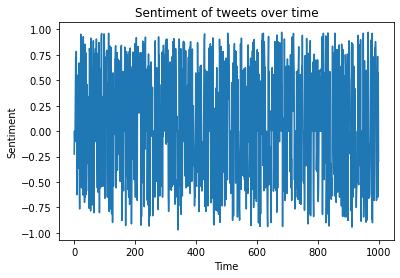

In [275]:
plt.figure
plt.plot(sentiment)
plt.xlabel("Time")
plt.ylabel("Sentiment")
plt.title("Sentiment of tweets over time")

<BarContainer object of 10 artists>

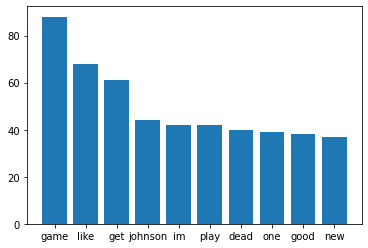

In [276]:
plt.figure
plt.bar(word_labels[0:10],word_counts[0:10])
